In [1]:
## Parameters specific to where your folders are and your data
parameter_file = 'params/params.yaml'
import yaml
import sys

with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
anno_gff=doc['annotation']


tss_annotation = doc['tss_annotation']


import os
os.chdir
import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm

from os.path import basename
##mpl.use('Agg')
#mpl.style.use('ggplot')
#mpl.style.use('fivethirtyeight')
from Homer import *

print('Number of tissues: ',len(tissues))

('Number of tissues: ', 15)


In [2]:
import plot_tss_results

## peak bins -1kb:+1kb, no introns

# Txn

('Number of genes with greater than 10 peaks:', 0)
('Percent identified: ', 0.49328013439731205)


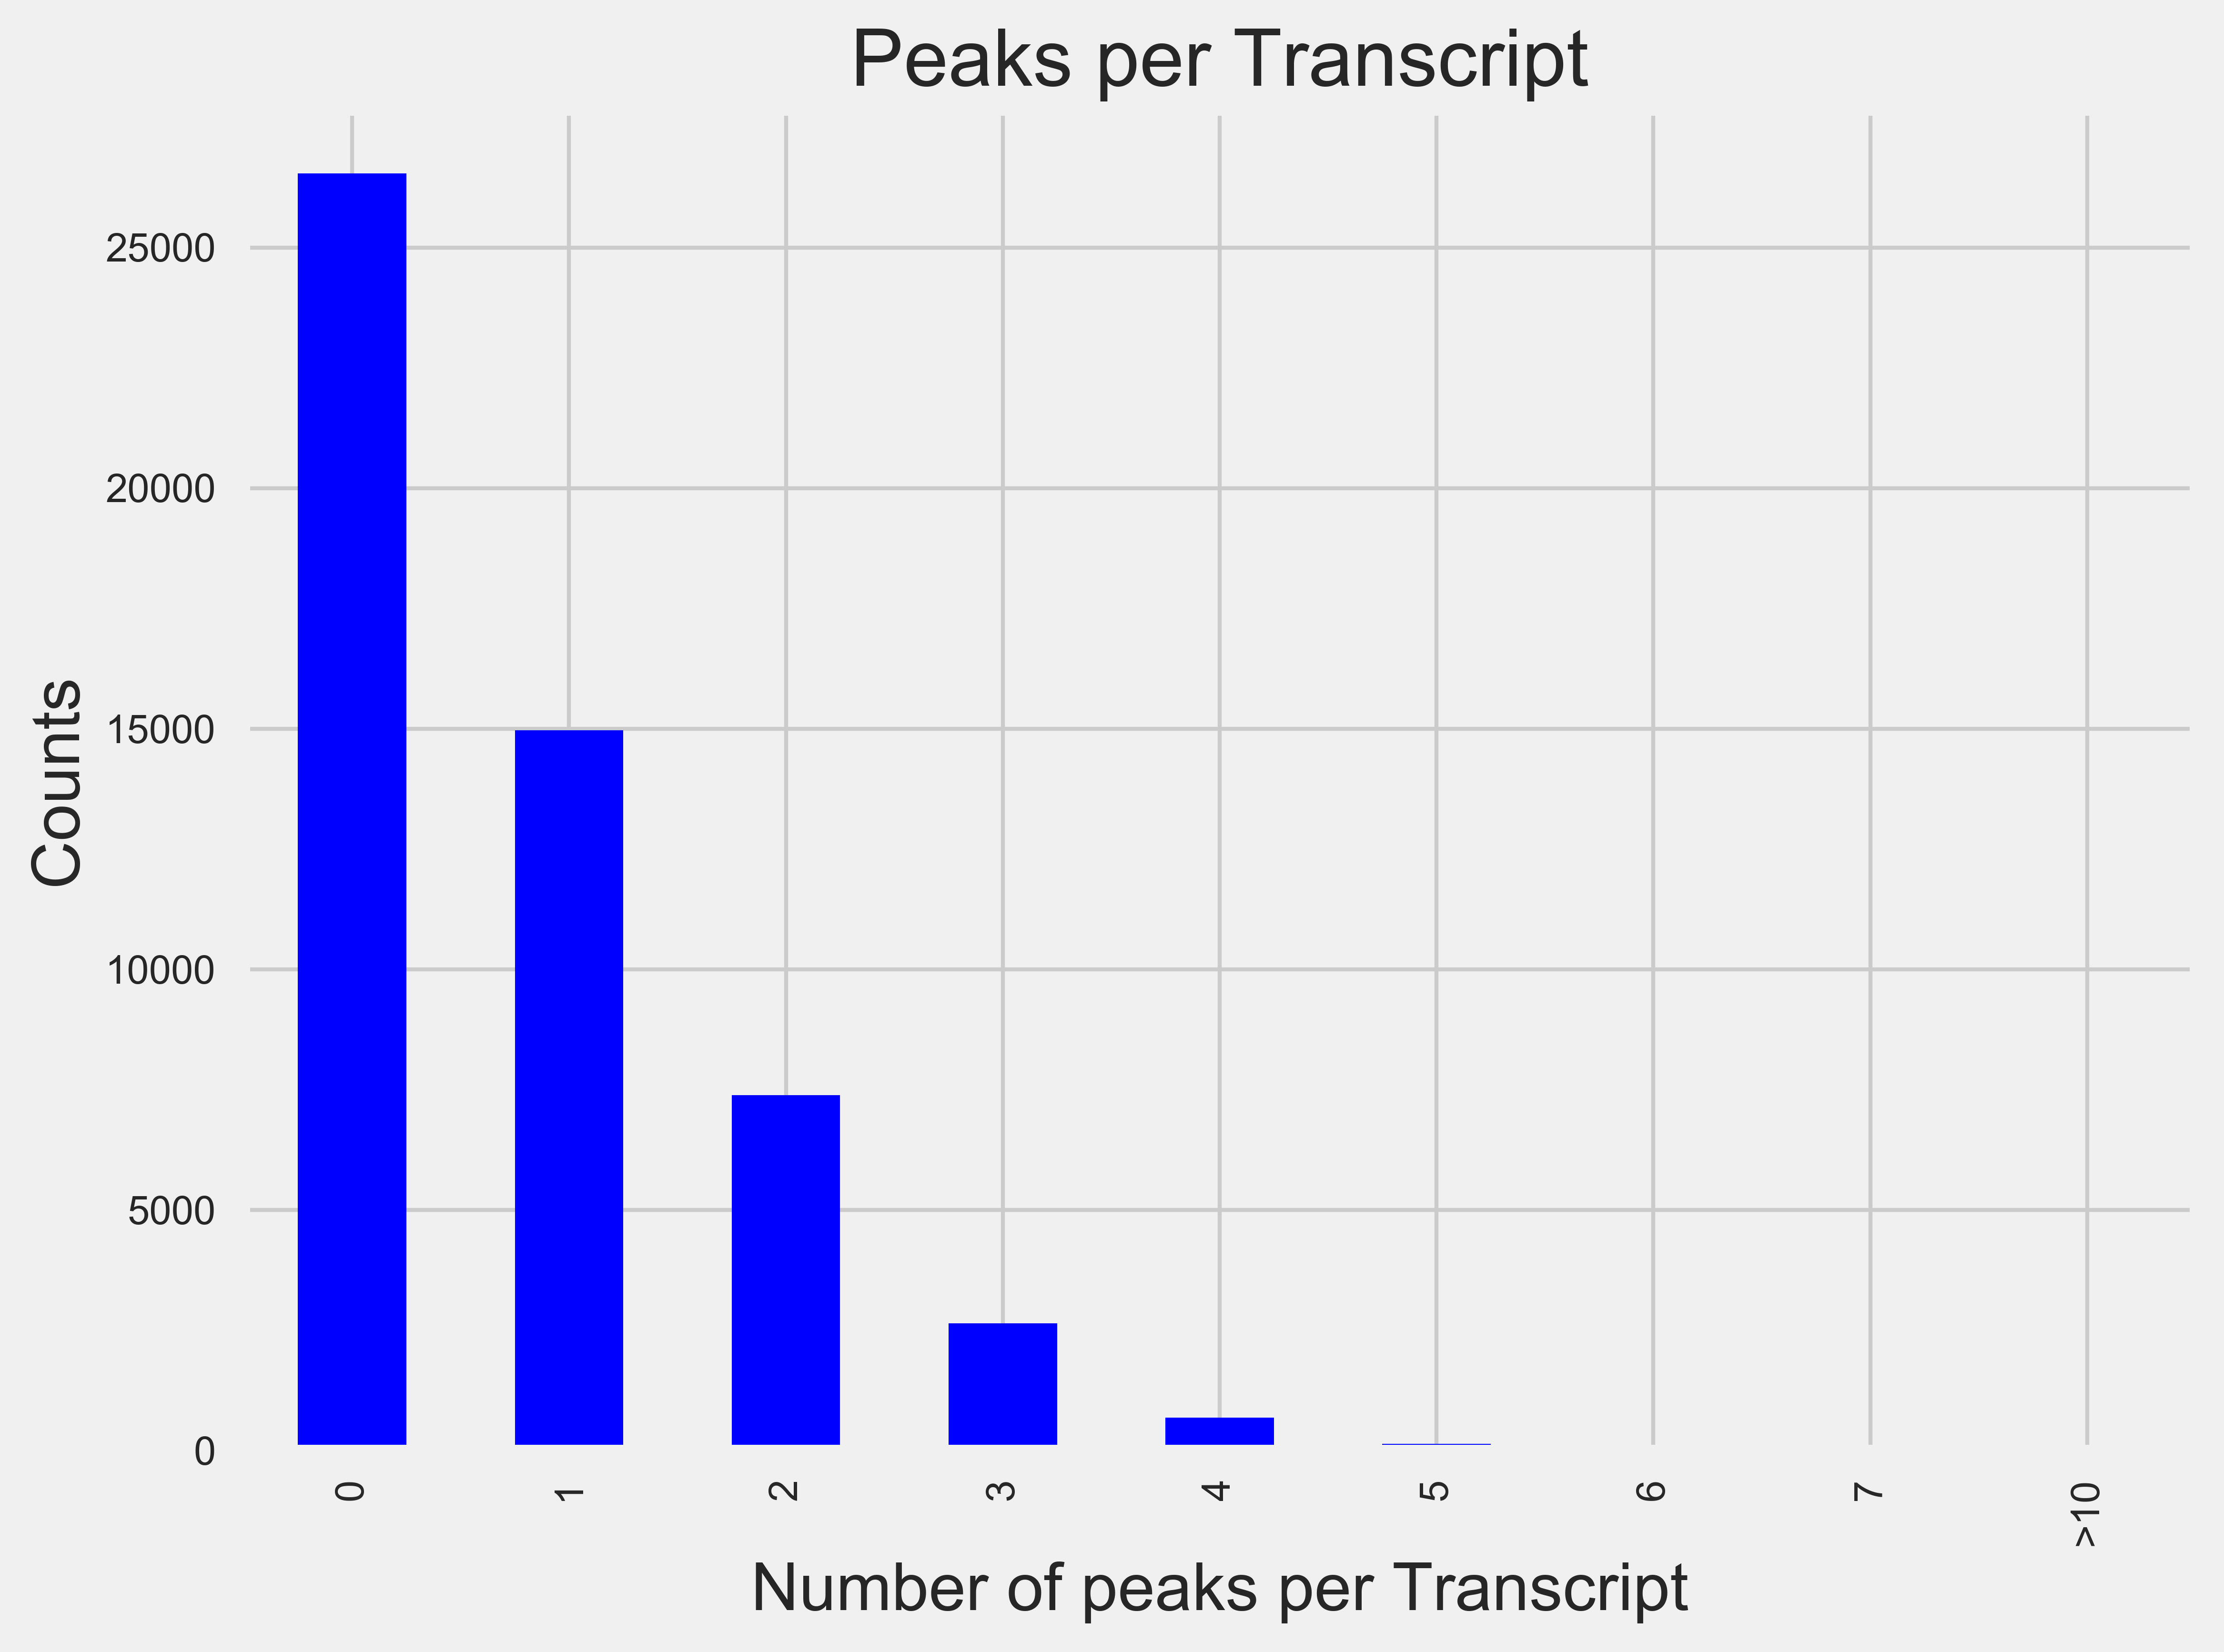

In [4]:
f_in = 'Results/tss_annotation/txn_df_02.p'
f_save = 'Results/tss_annotation/Figures/peaks_per_landmark/txn_df_02'
landmark_name = 'Transcript'

plot_tss_results.plot_peaks_per_landmark(f_in,landmark_name)

/data/isshamie/TSS/Analysis/src/plot_tss_results.py:82: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'CHO' in curr:


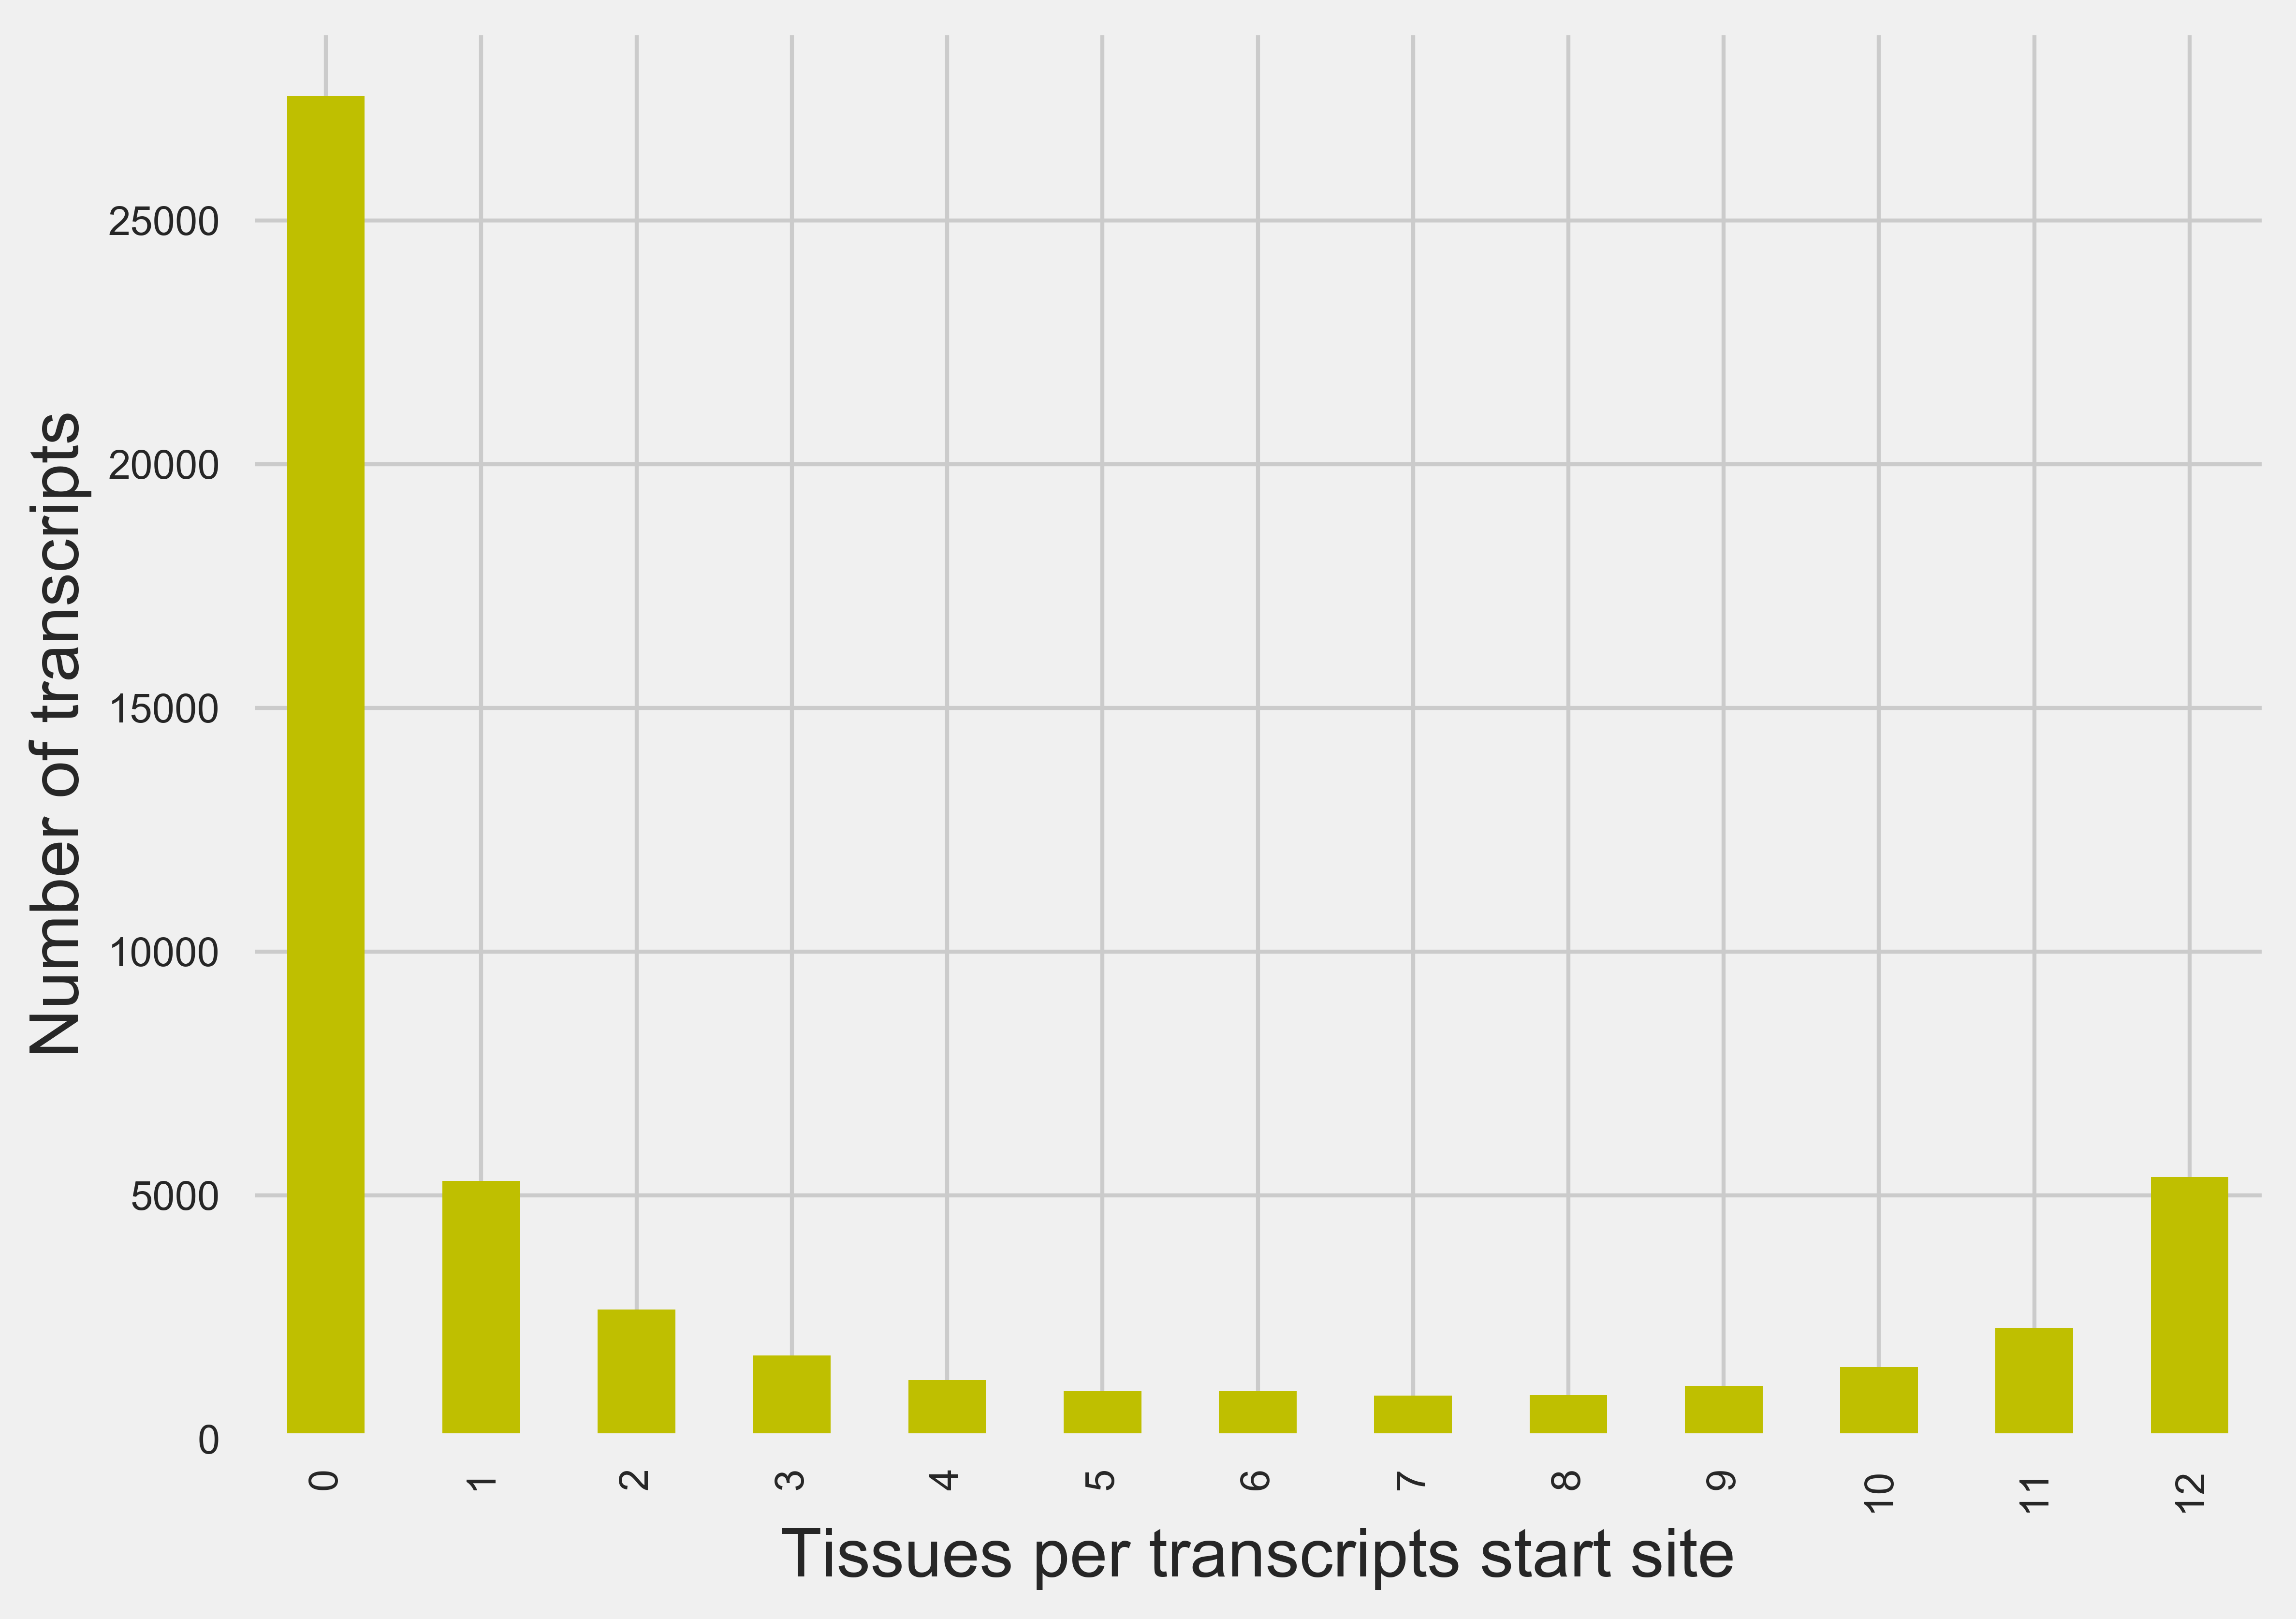

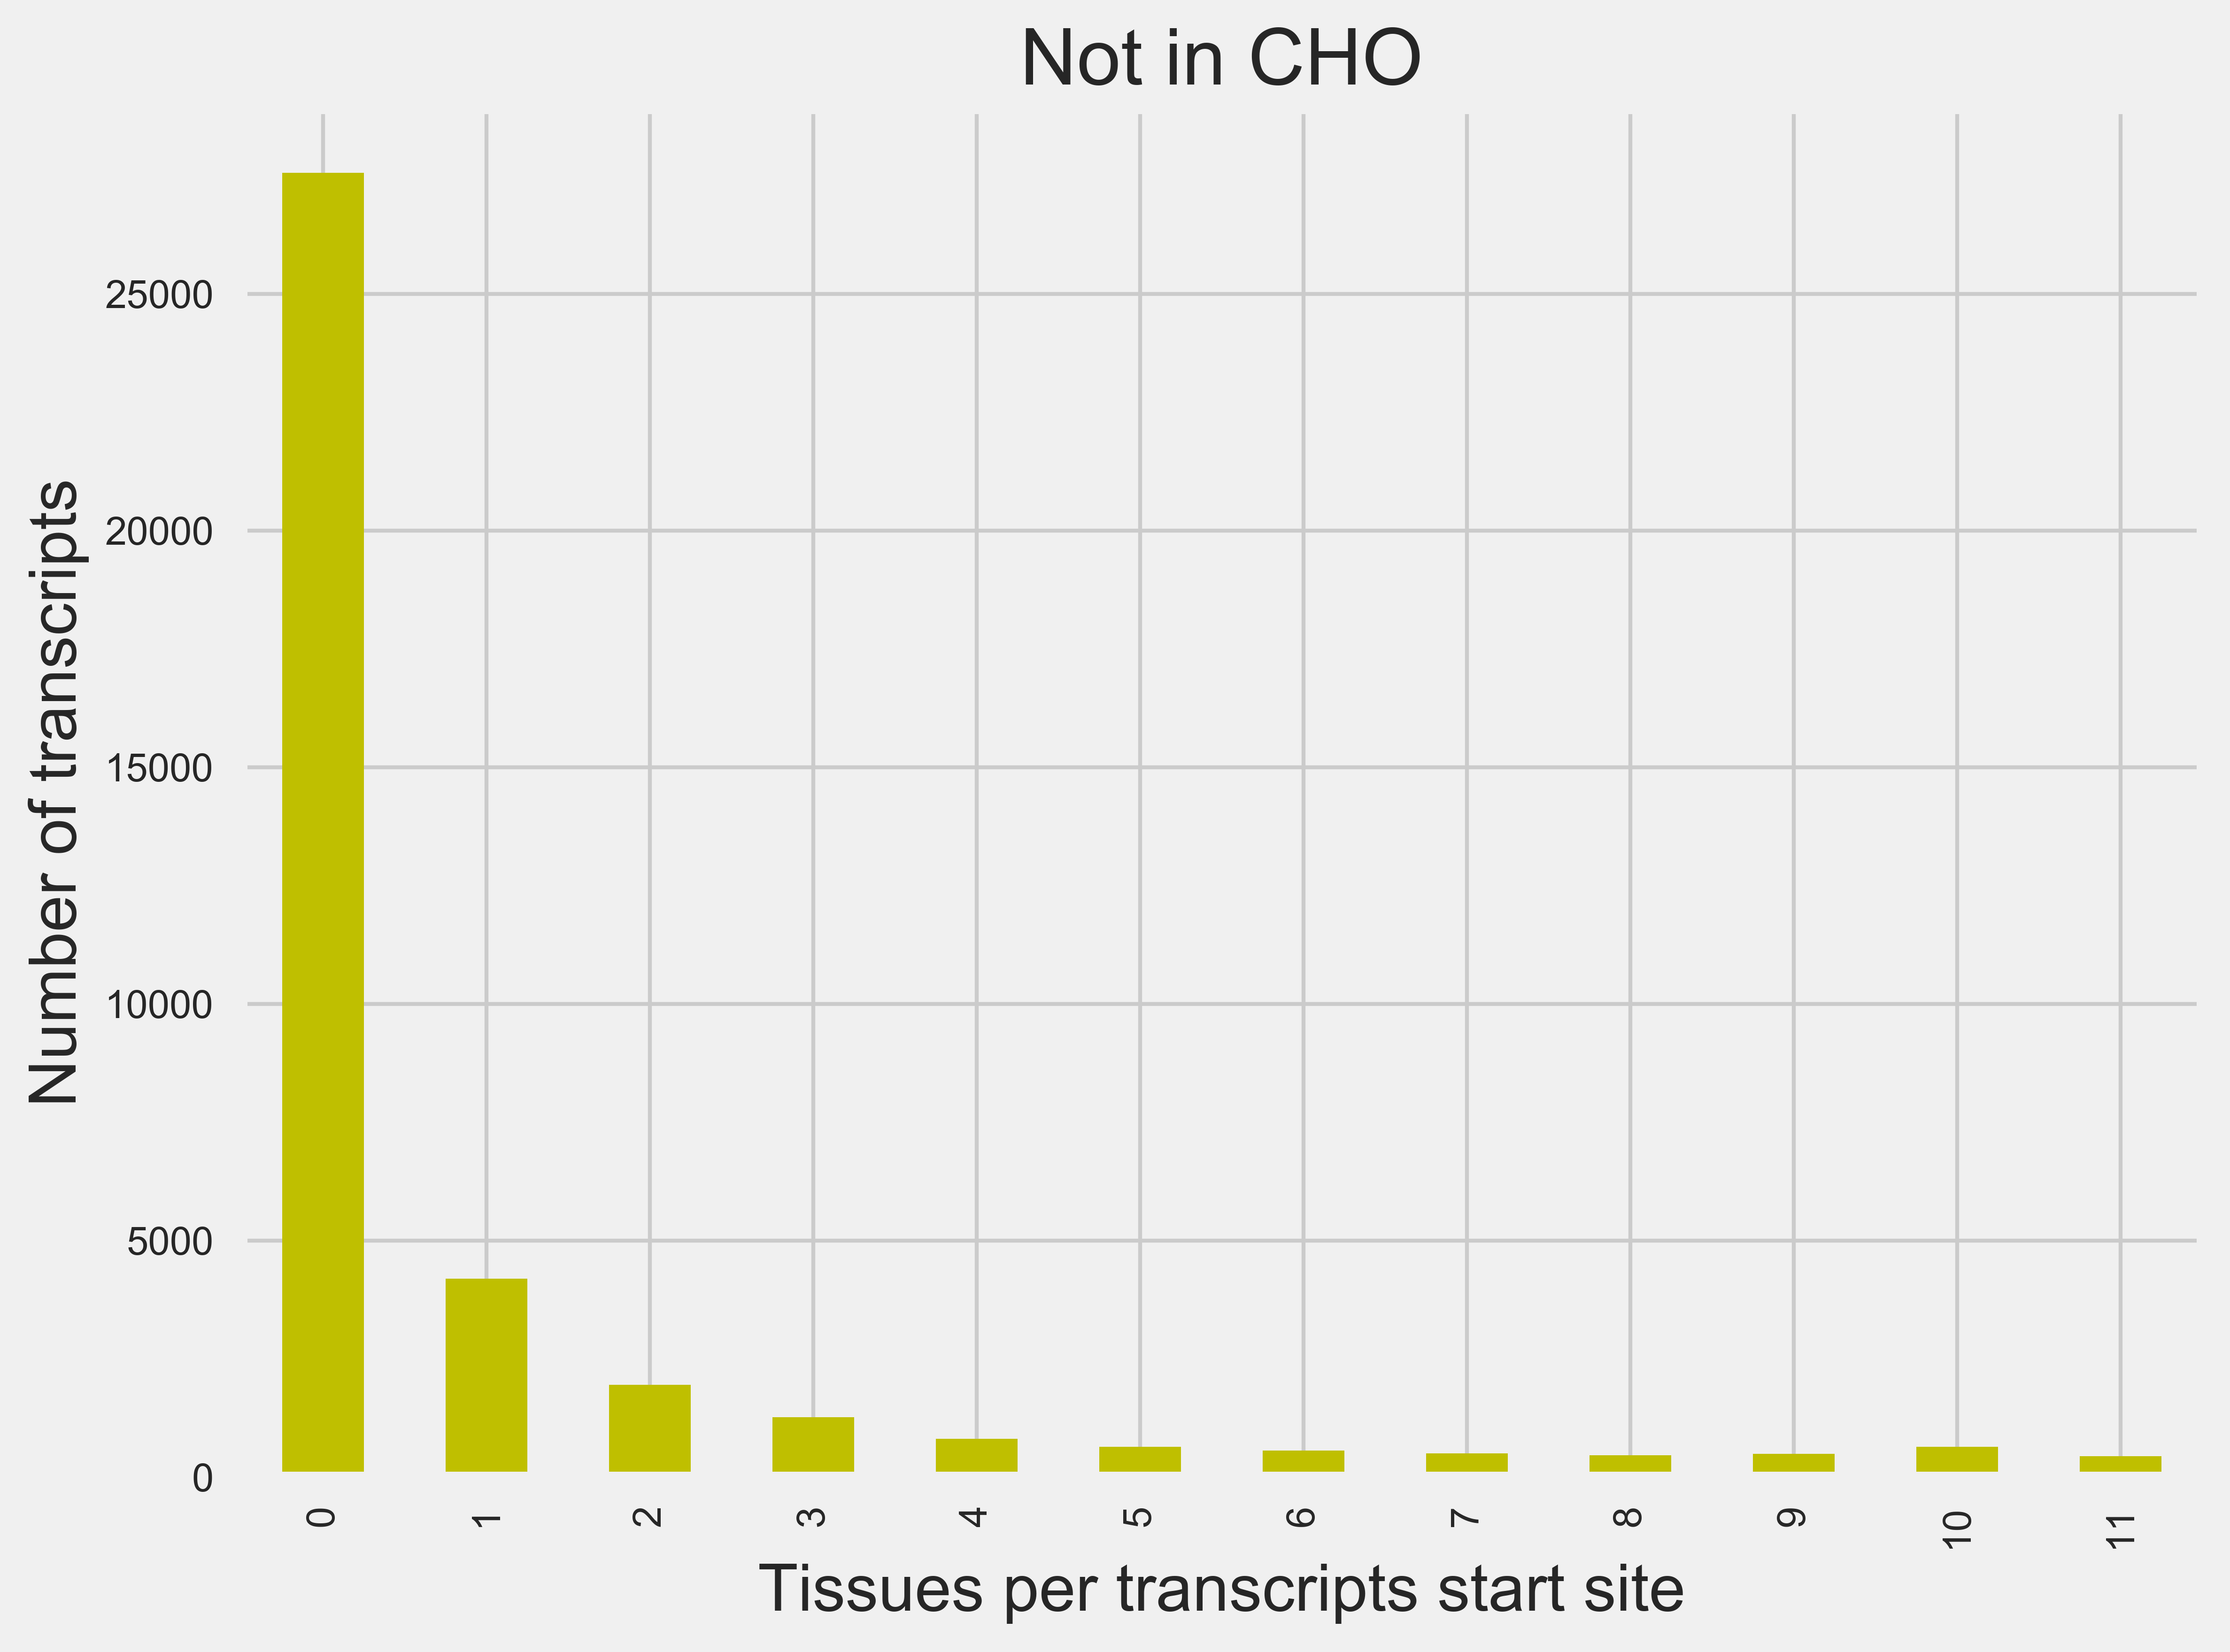

In [5]:
f_mat_in = 'Results/tss_annotation/txn_df_02_matrix'
f_in = 'Results/tss_annotation/txn_df_02.p' 
f_save = 'Results/tss_annotation/Figures/txn_df_02_samples_frac'
plot_tss_results.plot_sample_by_genes(f_mat_in,f_in,f_save=f_save,landmark_name='transcripts'  )

f_save = 'Results/tss_annotation/Figures/txn_df_02_tissues_per_tss'
plot_tss_results.collapse_on_experimental_type(f_in,f_save=f_save,landmark_name='transcripts' )

# Gene

('Number of genes with greater than 10 peaks:', 134)
('Percent identified: ', 0.8504000927751363)


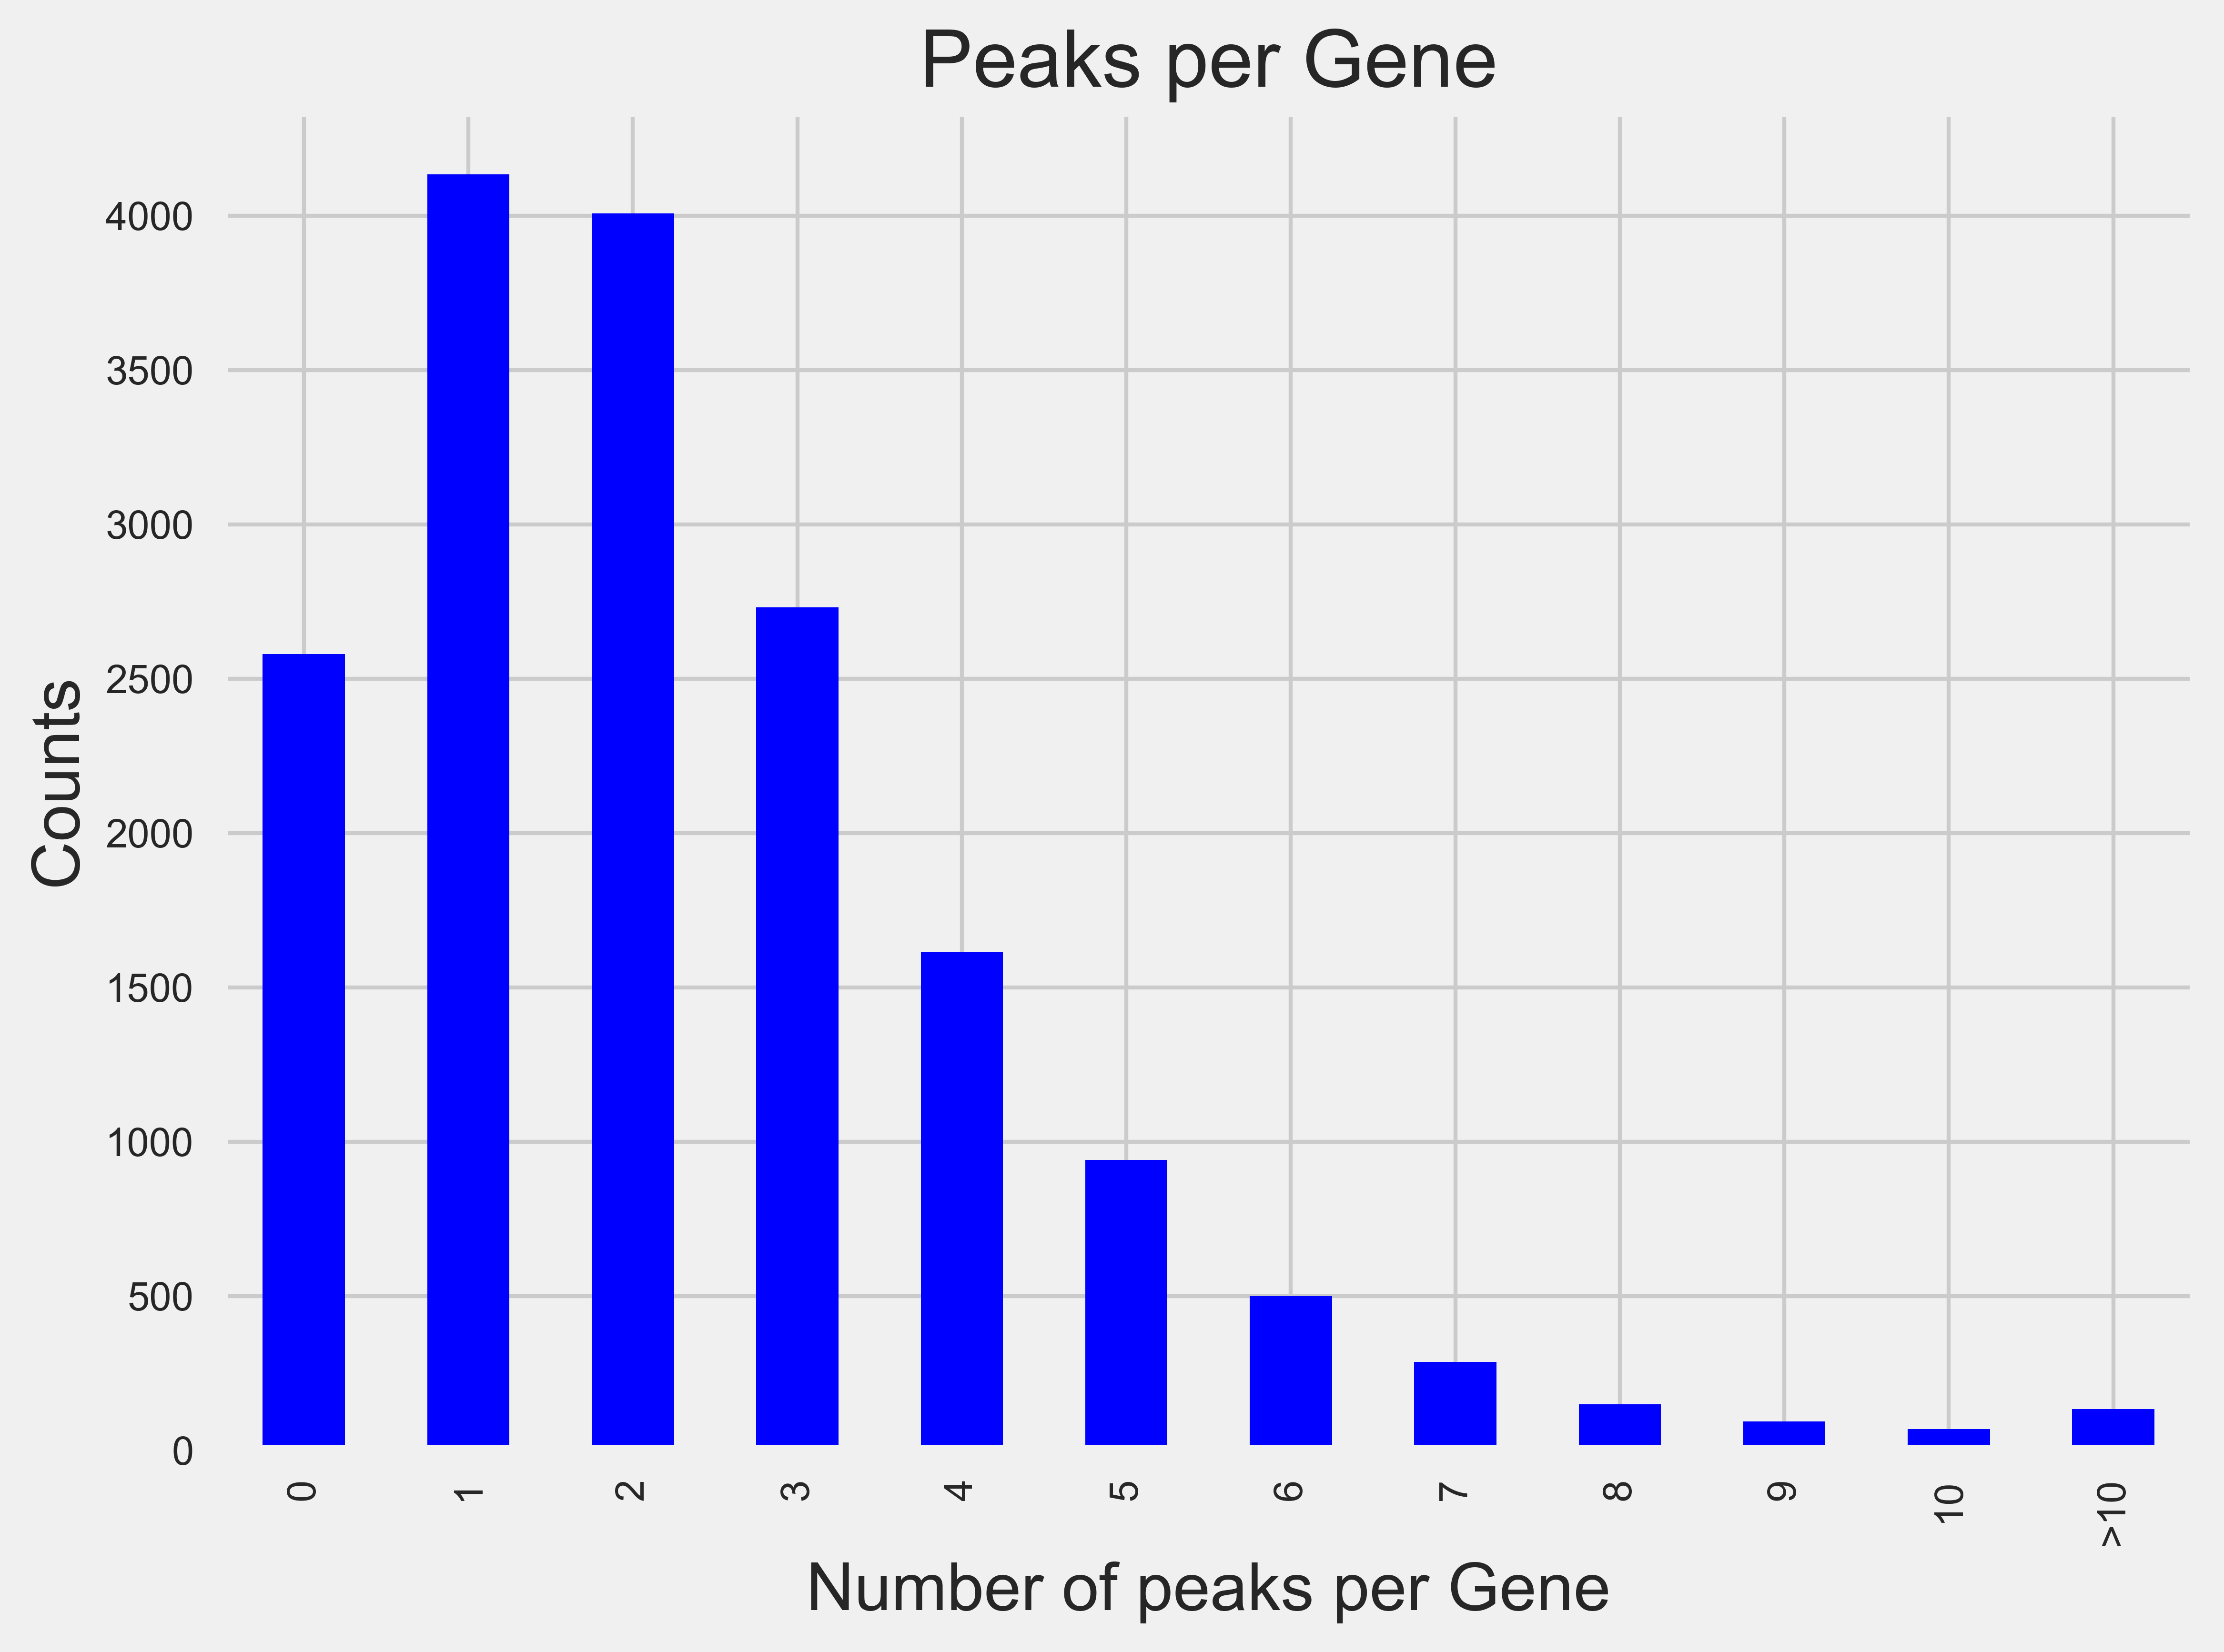

In [7]:
f_in = 'Results/tss_annotation/gene_df_02.p'
f_save = 'Results/tss_annotation/Figures/peaks_per_landmark/gene_df_02'
landmark_name = 'Gene'

plot_tss_results.plot_peaks_per_landmark(f_in,landmark_name)

/data/isshamie/TSS/Analysis/src/plot_tss_results.py:83: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  in_cho.append(len(curr))


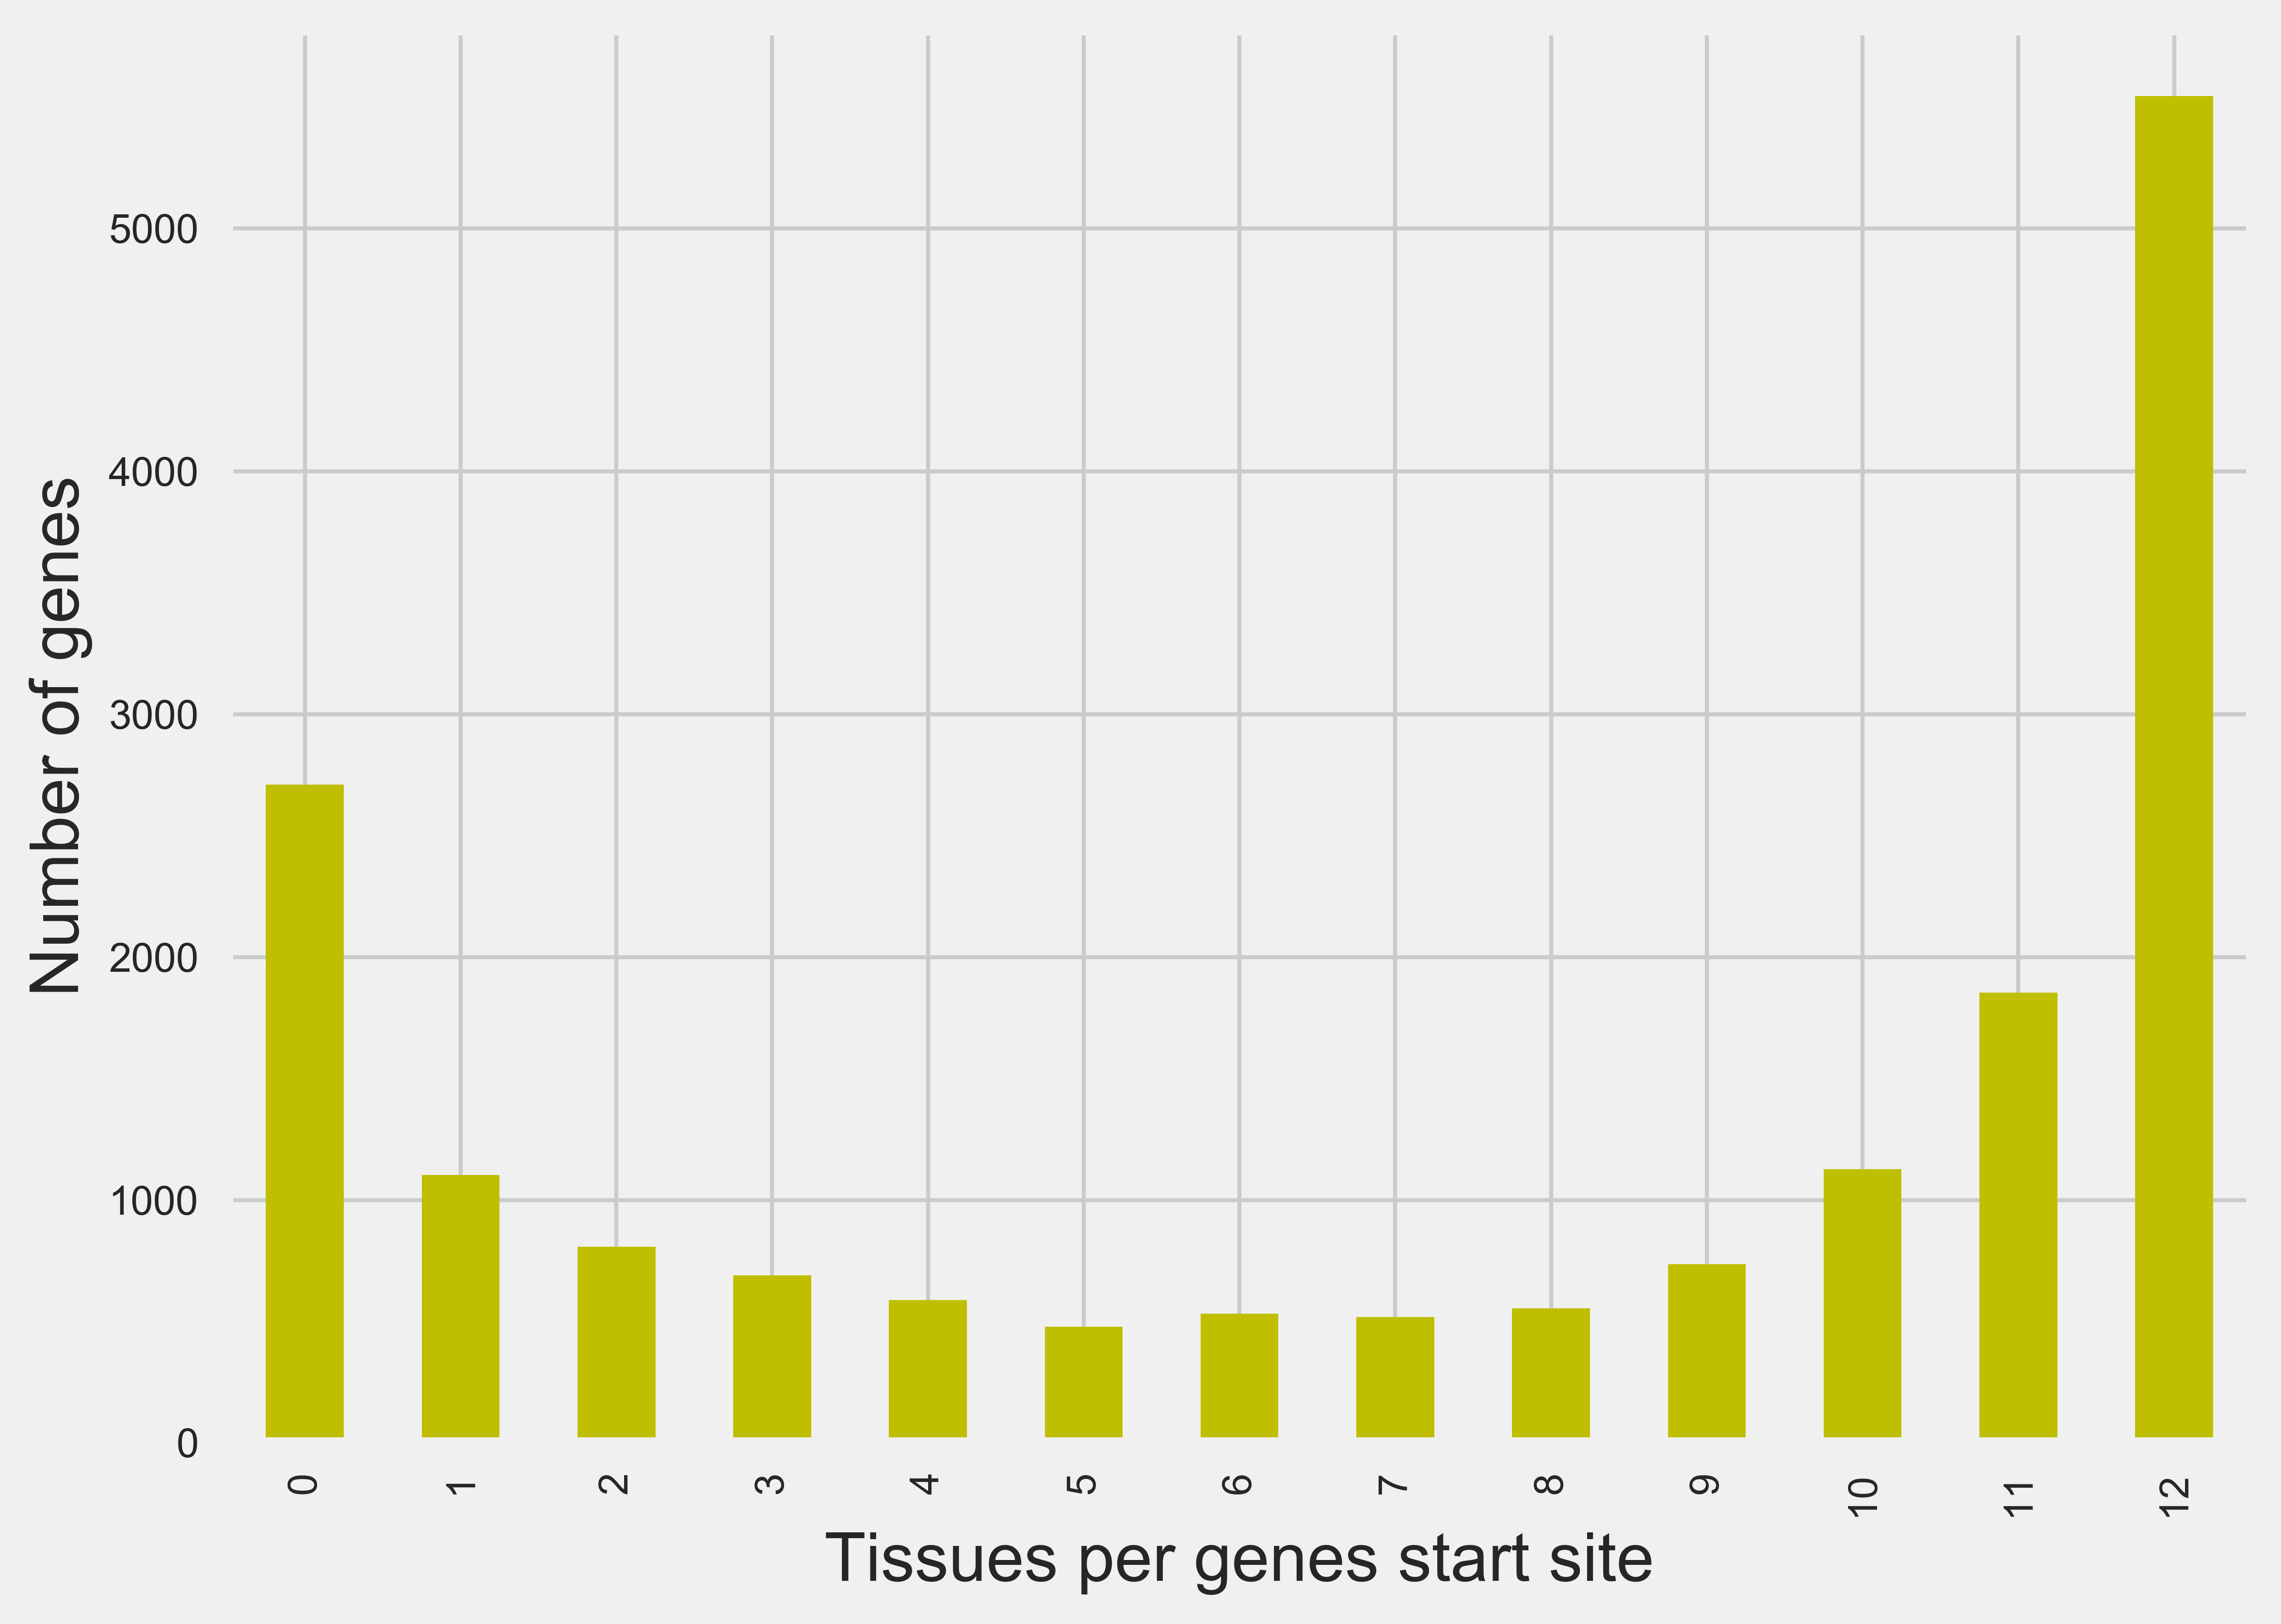

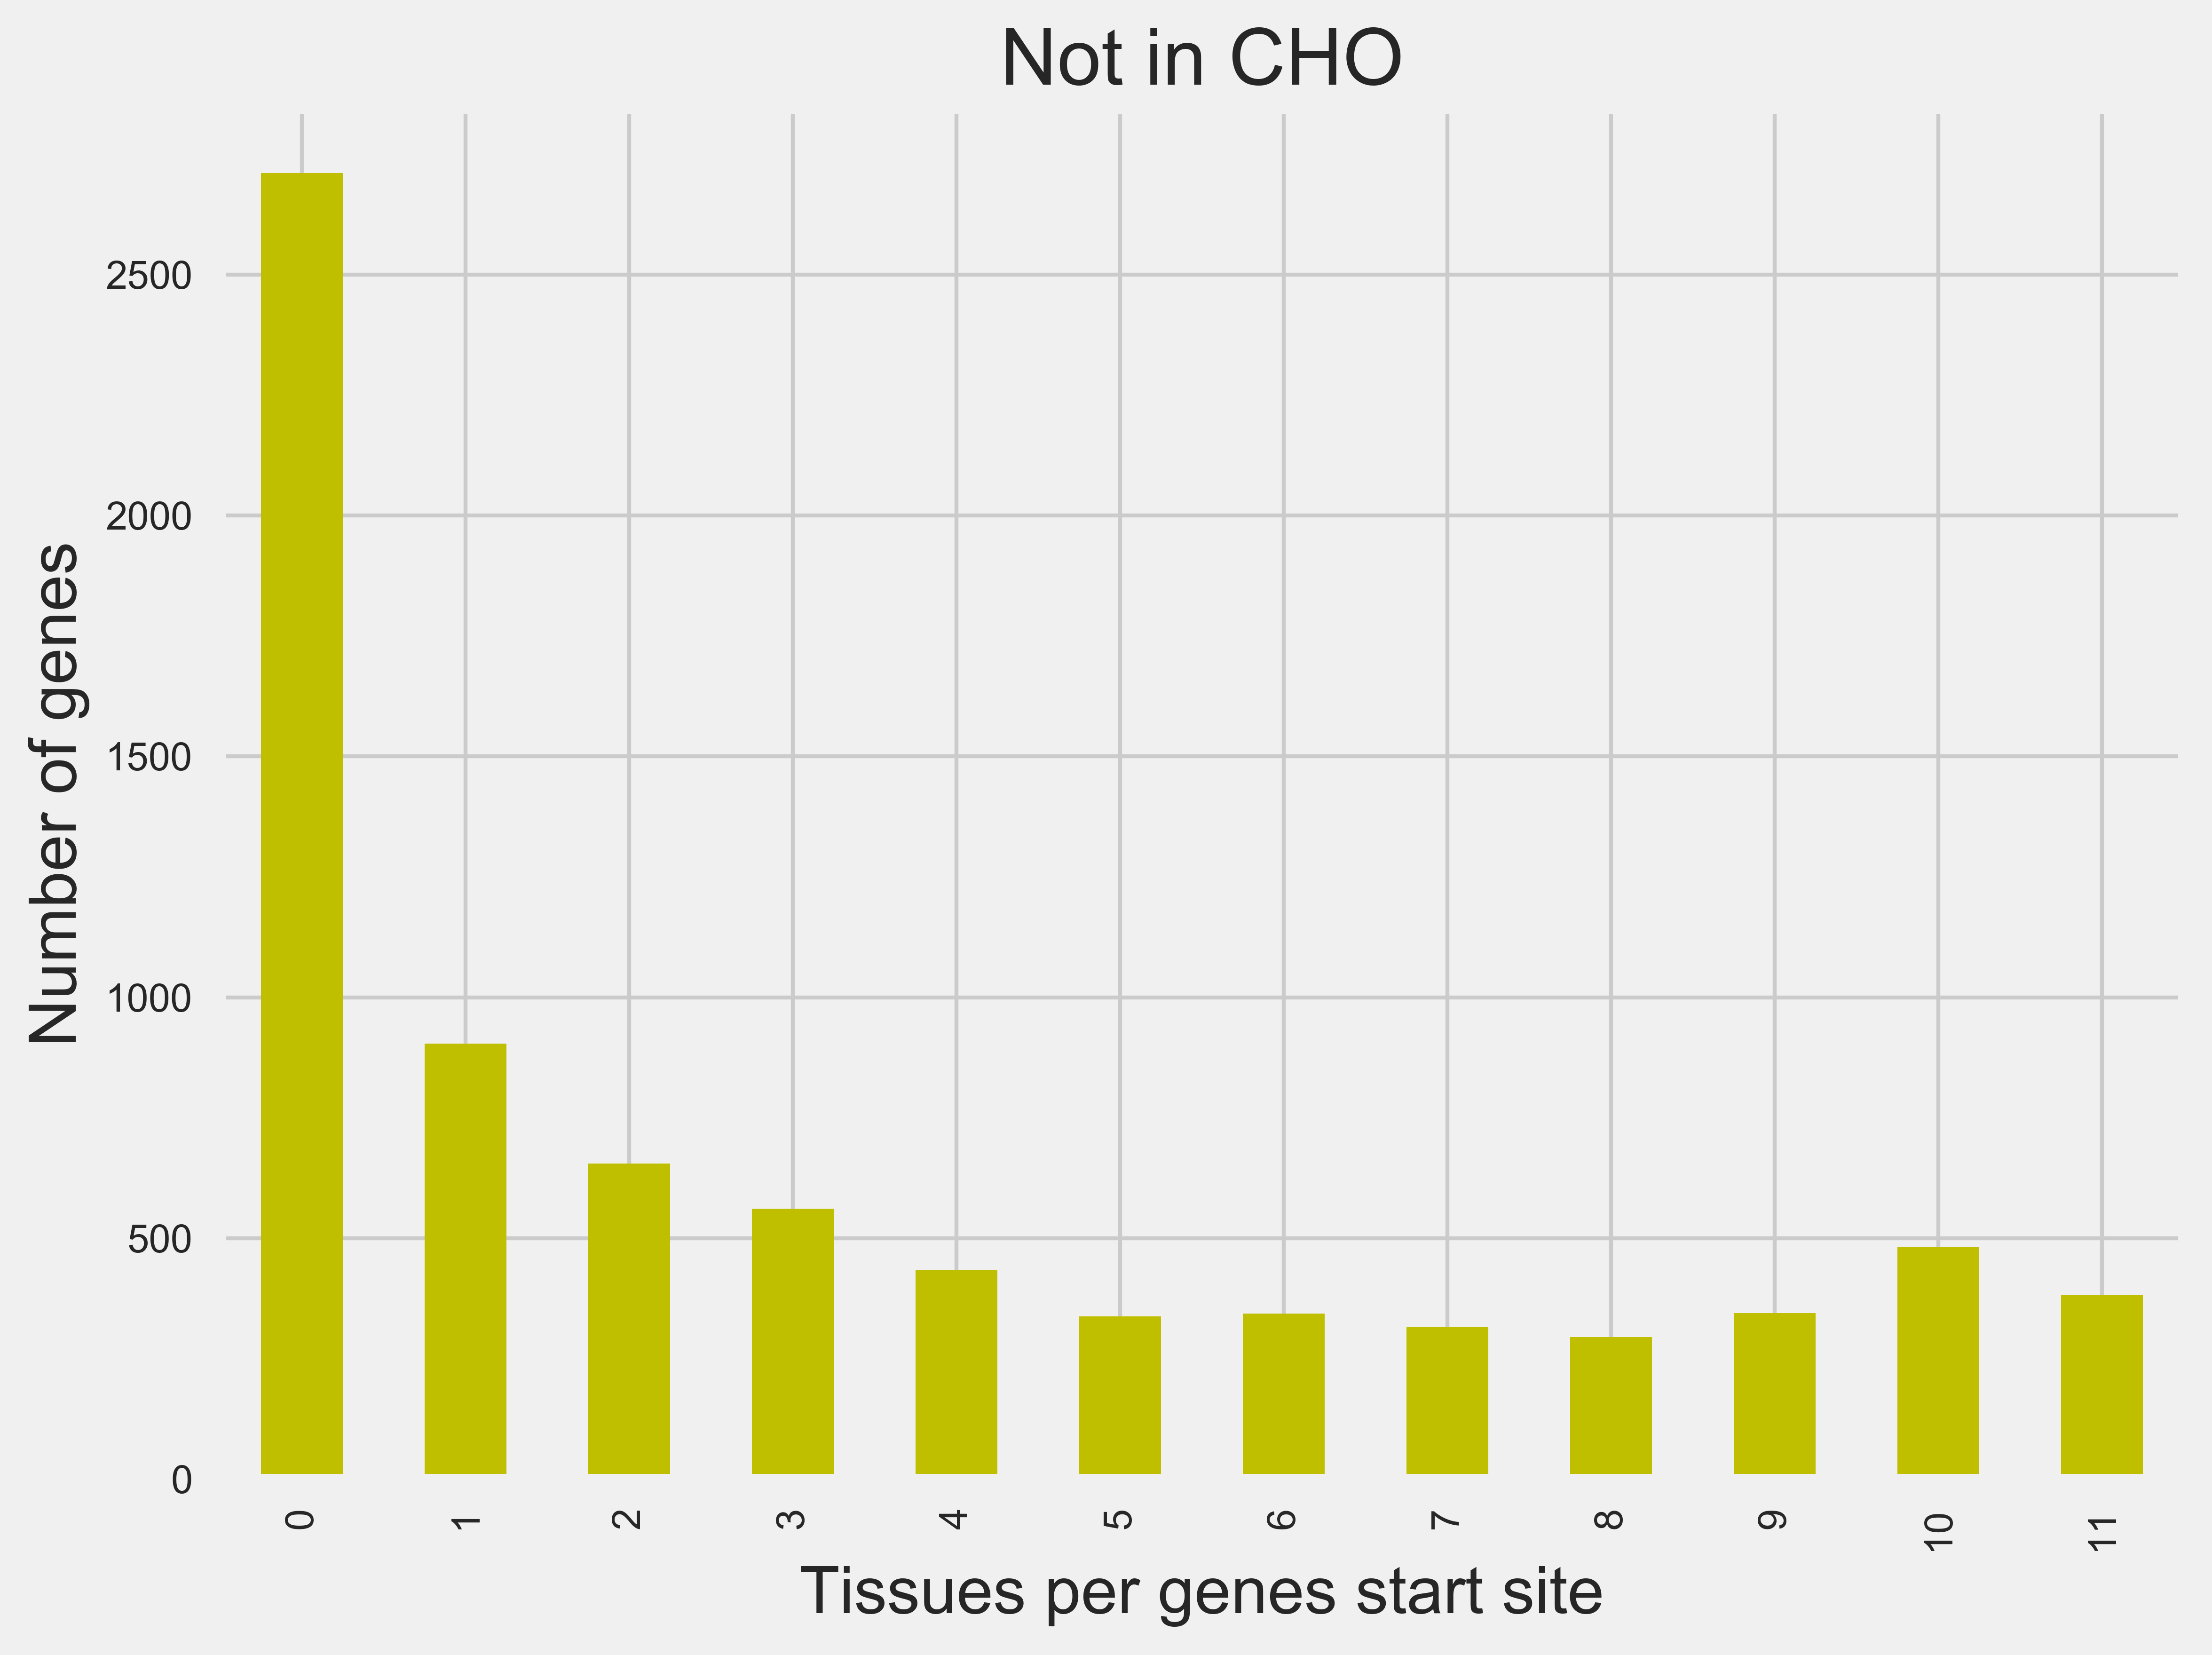

In [8]:
f_in = 'Results/tss_annotation/gene_df_02.p' 
f_save = 'Results/tss_annotation/Figures/gene_df_02_tissue_per_tss'
plot_tss_results.collapse_on_experimental_type(f_in,f_save=f_save,landmark_name='genes' )

In [9]:
f_save = 'Results/tss_annotation/Figures/gene_df_02_tissues_frac'
plot_tss_results.plot_tss_across_tissues(f_in, tissues, landmark_name='genes',f_save=f_save)

# Gene_df

('Number of genes with greater than 10 peaks:', 134)
('Percent identified: ', 0.8504000927751363)


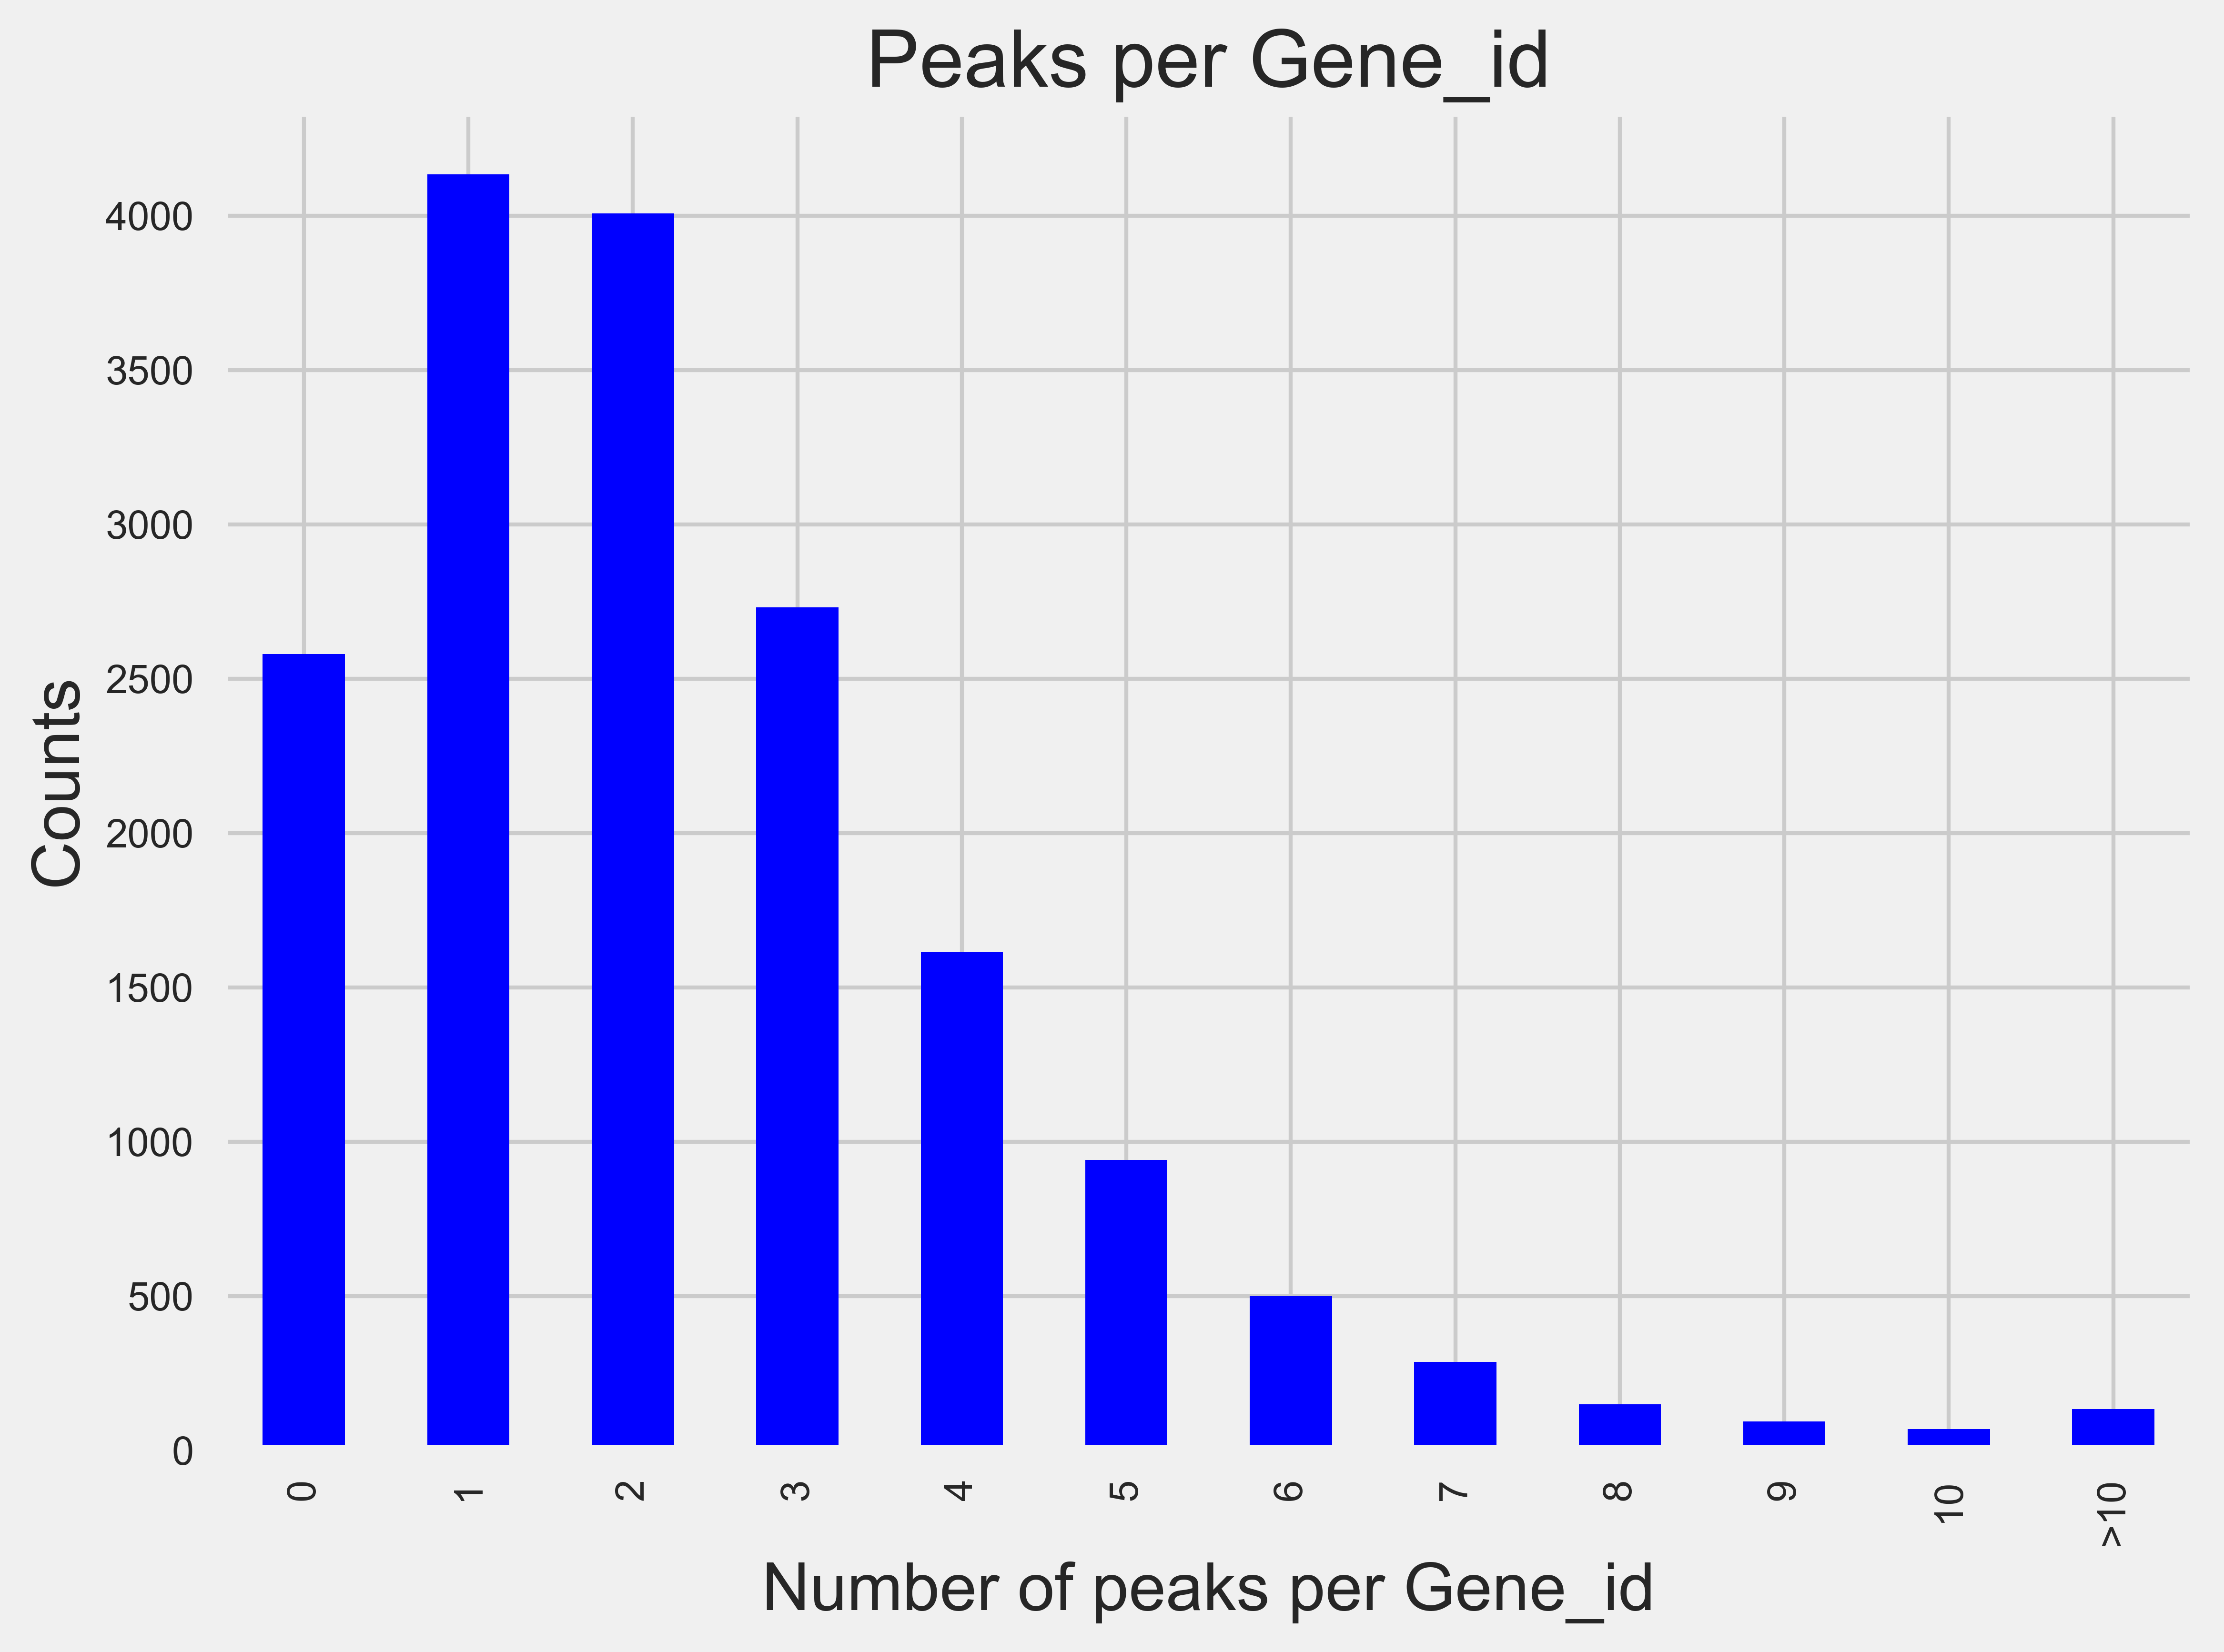

In [10]:
f_in = 'Results/tss_annotation/geneID_df_02.p'
f_save = 'Results/tss_annotation/Figures/peaks_per_landmark/geneID_df_02'
landmark_name = 'Gene_id'

plot_tss_results.plot_peaks_per_landmark(f_in,landmark_name)

### Plot the CDF of fraction of genes covered

In [3]:
def to_collapse(curr,collapse_mapping):
    collapse = set()
    for i in curr: 
        collapse.add(collapse_mapping[i])
    return list(collapse)

def create_binary(df,tissues,colname="tissues"):
    bin_df = pd.DataFrame(index=df.index,columns=tissues,dtype=bool)
    bin_df[:] = False
    for ind,val in tqdm.tqdm(df.iterrows()):
        bin_df.loc[ind,val["tissues"]] = True
        
    return bin_df

In [4]:
[tissue_map,tissue_map_short]= pickle.load(open("Results/tissue_map.p","rb"))

In [ ]:
f_in = 'Results/tss_annotation/txn_df_02.p' 
txn = pickle.load(open(f_in,"rb"))
txn["tissues"] = txn["samples"].apply(lambda x: to_collapse(x,tissue_map_short))
txb_bin = create_binary(txn,tissues,colname="tissues")

13760it [06:41, 33.58it/s]

In [ ]:
f_in = 'Results/tss_annotation/gene_df_02.p' 
gene = pickle.load(open(f_in,"rb"))
gene["tissues"] = gene["samples"].apply(lambda x: to_collapse(x,tissue_map_short))
gene_bin = create_binary(gene,tissues,colname="tissues")

## Create CDF of genes

In [ ]:
## Create CDF of genes

## Steps:
# 1. Create dictionary of tissue combo to number of genes 
# 1. Double for loop and get the pairwise union overlap
# 2. Pop them from list
# 3. While not done with all columns
     #-Loop through and find the next maximum overlap
     #-Add to dictionary
     #-Pop from list
cdf_tissues = []
cdf_number = []
all_cols = list(gene_bin.columns.values)
max_overlap = 0
max_combo = ()
max_num = 0
for i in all_cols:
    for j in all_cols[1:]:
        overlap =  set((gene_bin[gene_bin[i]].index)).union(set((gene_bin[gene_bin[j]].index)))
        if len(overlap) > max_num:
            max_overlap = overlap
            max_num = len(overlap)
            max_combo  = (i,j)
            


cdf_tissues.append(max_combo[np.argmax([gene_bin[max_combo[0]].sum(),gene_bin[max_combo[1]].sum()])])
cdf_tissues.append(max_combo[np.argmin([gene_bin[max_combo[0]].sum(),gene_bin[max_combo[1]].sum()])])

cdf_number.append(max(gene_bin[max_combo[0]].sum(),gene_bin[max_combo[1]].sum()))
cdf_number.append(max_num)

all_cols.remove(max_combo[0])
all_cols.remove(max_combo[1])

while len(all_cols) > 0:
    no_addition = True
    for i in all_cols:
        overlap =  max_overlap.union(set((gene_bin[gene_bin[i]].index)))
        if len(overlap) > max_num:
            max_num = len(overlap)
            max_ind = i
            no_addition = False
    if no_addition:
        break
        
    max_overlap = max_overlap.union(set((gene_bin[gene_bin[max_ind]].index)))
    cdf_tissues.append(max_ind)
    cdf_number.append(max_num)
    all_cols.remove(max_ind)
     
  

In [ ]:
plt.scatter(np.arange(1,len(cdf_number)+1),cdf_number)
plt.xlabel("Number of Tissues")
plt.ylabel("Cumulative Number of Genes Detected")
plt.savefig("Results/Figures/cdf_tissues_geneID_df_02.png",bbox_inches="tight")

In [ ]:
cdf_tissues

In [11]:
tss = pd.read_csv(tss_annotation,sep='\t',index_col=0)

In [12]:
peak_tissue_matrix = pd.read_csv('Results/merged/samples.merge.peaksexpression',index_col=0,sep='\t')
peak_tissue_matrix.head()

f04_peaks/Brain_START2_and_Brain_STARTinput1  \
0                                          15.5   
1                                           9.6   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   f04_peaks/Brain_GROCap1_and_Brain_GRO1  \
0                                    5.12   
1                                   50.80   
2                                    0.00   
3                                    0.00   
4                                    0.00   

   f04_peaks/FemaleReproductive_START1_and_FemaleReproductive_STARTinput1  \
0                                                0.0                        
1                                                0.0                        
2                                                0.0                        
3                                                0.0                        
4                                                0.0                        

   f04_peaks/Kidney_START1_and_Kidney_STARTinput1  \
0                                           26.50   
1                                            4.09   
2                                            0.00   
3                                            0.00   
4                                            0.00   

   f04_peaks/Muscle_START2_and_Muscle_STARTinput1  \
0                                           22.50   
1                                            7.78   
2                                            0.00   
3                                            0.00   
4                                            0.00   

   f04_peaks/Heart_START1_and_Heart_STARTinput1  \
0                                          2.34   
1                                          3.68   
2                                          0.00   
3                                          0.00   
4                                          0.00   

   f04_peaks/Lung_GROCap1_and_Lung_GRO1  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   f04_peaks/Liver_START2_and_Liver_STARTinput1  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           2.5   

   f04_peaks/MiscOrgans_START2_and_MiscOrgans_STARTinput1  \
0                                               9.37        
1                                               6.30        
2                                               0.00        
3                                               0.00        
4                                               0.00        

   f04_peaks/Muscle_START1_and_Muscle_STARTinput1  \
0                                            1.93   
1                                            5.78   
2                                            0.00   
3                                            0.00   
4                                            0.00   

                      ...                      \
0                     ...                       
1                     ...                       
2                     ...                       
3                     ...                       
4                     ...                       

   f04_peaks/Brain_START1_and_Brain_STARTinput2  \
0                                         23.00   
1                                          5.25   
2                                          0.00   
3                                          0.00   
4                                          0.00   

   f04_peaks/FemaleReproductive_START2_and_FemaleReproductive_STARTinput1  \
0                                              16.10                        
1        

In [13]:
meta_samples = pd.read_csv("../raw_metaSamples.tsv",sep="\t",index_col=0)
meta_samples.head()

Tissue Experiment  \
CHBMDM1hKLA2_ATAC_JHS1000_SD_AGGTTGGG_S11_L001_...  BMDM1hKLA       ATAC   
CHBMDM1hKLA1_ATAC_JHS998_SD_TGGGTTTC_S9_L001_R1...  BMDM1hKLA       ATAC   
CHBMDM1hKLA_GRO_JHS1027_SD_CAAAAG_S42_L003_R1_0...  BMDM1hKLA        GRO   
CHBMDM1hKLA_GRO_JHS1034_SD_AGTCAA_S49_L003_R1_0...  BMDM1hKLA     GROCap   
CHBMDMwt_GRO_JHS1026_SD_ATTCCT_S41_L003_R1_001....     BMDMwt        GRO   

                                                                 Name  \
CHBMDM1hKLA2_ATAC_JHS1000_SD_AGGTTGGG_S11_L001_...    BMDM1hKLA_ATAC1   
CHBMDM1hKLA1_ATAC_JHS998_SD_TGGGTTTC_S9_L001_R1...    BMDM1hKLA_ATAC2   
CHBMDM1hKLA_GRO_JHS1027_SD_CAAAAG_S42_L003_R1_0...     BMDM1hKLA_GRO1   
CHBMDM1hKLA_GRO_JHS1034_SD_AGTCAA_S49_L003_R1_0...  BMDM1hKLA_GROCap1   
CHBMDMwt_GRO_JHS1026_SD_ATTCCT_S41_L003_R1_001....        BMDMwt_GRO1   

                                                                                                 Full  
CHBMDM1hKLA2_ATAC_JHS1000_SD_AGGTTGGG_S11_L001_...  CHBMDM1hKLA2_ATAC_JHS1000_SD_AGGTTGGG_S11_L001...  
CHBMDM1hKLA1_ATAC_JHS998_SD_TGGGTTTC_S9_L001_R1...  CHBMDM1hKLA1_ATAC_JHS998_SD_TGGGTTTC_S9_L001_R...  
CHBMDM1hKLA_GRO_JHS1027_SD_CAAAAG_S42_L003_R1_0...  CHBMDM1hKLA_GRO_JHS1027_SD_CAAAAG_S42_L003_R1_...  
CHBMDM1hKLA_GRO_JHS1034_SD_AGTCAA_S49_L003_R1_0...  CHBMDM1hKLA_GRO_JHS1034_SD_AGTCAA_S49_L003_R1_...  
CHBMDMwt_GRO_JHS1026_SD_ATTCCT_S41_L003_R1_001....  CHBMDMwt_GRO_JHS1026_SD_ATTCCT_S41_L003_R1_001...

### Tissues overall gene expression

In [ ]:
f = plt.figure(dpi=300)
ax = (np.sum((gene_tissue_matrix>0))/gene_df.shape[0]).plot.bar(color='b')
ax.set_title('Fraction of genes with a peak');
ax.set_xticklabels(meta_samples.loc[gene_tissue_matrix.columns,'Short']);
plt.tight_layout()
plt.savefig('Results/Figures/tissue_genes.pdf')

## Collapse experimental type 

In [ ]:
tissues_genes = dict()
for t in tissues:
    tissues_genes[t] = 0

for ind,val in gene_df.iterrows():
    curr_ts = set()
    for t in val['maxTissues']:
        curr_ts.add(t.split('_')[0])
    for t in curr_ts:
        tissues_genes[t] += 1
        if '1h' in t or 'KLA' in t:
            print(t)

no_peak = []
for t in tissues_genes:
    if tissues_genes[t] == 0:
        no_peak.append(t)

for t in no_peak:
    tissues_genes.pop(t,None)

plt.bar(range(len(tissues_genes)), 1.0*np.array(tissues_genes.values())/(gene_df.shape[0]), align='center')
plt.xticks(range(len(tissues_genes)), list(tissues_genes.keys()),rotation=90);
plt.ylabel('Fraction of genes covered by tissue')
plt.title('TSS across tissues')

### Tissue Distribution

In [ ]:
not_in_cho = []
in_cho = []
all_t = []
for g in gene_df['tissues']:
    curr = [i.split('_')[0] for i in g ]
    curr = np.unique(np.array(curr))
    if 'CHO' in curr:
        in_cho.append(len(curr))
    else:
        not_in_cho.append(len(curr))
    all_t.append(len(curr))

f = plt.figure(dpi=300)
pd.Series(Counter(all_t)).plot.bar(color='y')
plt.xlabel('Tissues per gene start site')
plt.ylabel('Number of genes')
plt.savefig('Results/Figures/num_tissues.pdf',bbox_inches='tight')

f = plt.figure(dpi=300)
pd.Series(Counter(not_in_cho)).plot.bar(color='y')
plt.xlabel('Tissues per gene start site')
plt.title('Not in CHO')
plt.ylabel('Number of genes')
plt.savefig('Results/Figures/num_tissues_not_in_cho.pdf',bbox_inches='tight')

In [ ]:
from IPython.display import Image
Image(filename='/home/isshamie/chapter_break.png')

In [ ]:
from IPython.display import Image
Image(filename='/home/isshamie/chapter_break.png')

In [ ]:
from IPython.display import Image
Image(filename='/home/isshamie/chapter_break.png')

# 1kb - 1kb

In [ ]:
txn_df = pickle.load(open('Results/txn_df_1kb_1kb.p','rb'))
gene_df = pickle.load(open('Results/gene_df_1kb_1kb.p','rb'))
gene_id_df = pickle.load(open('Results/gene_id_df_1kb_1kb.p','rb'))
gene_tissue_matrix = pd.read_csv('Results/merged/genes_tissues_1kb_1kb.csv',index_col = 0)

In [ ]:
print('Percent of isoforms identified: ', 1.0*np.sum(txn_df['hasGene'])/txn_df.shape[0])
print('Percent of genes identified: ', 1.0*np.sum(gene_df['hasGene'])/gene_df.shape[0])

In [ ]:
#sns.distplot(start_sites_gff['Experimental'],kde=False,norm_hist=False)

f = plt.figure(dpi=300);
ax = f.add_subplot(1,1,1);
#ax.hist(gene_df['Number of SS']);
gene_df_small = gene_df[gene_df['Number of SS']<10]
gene_df_small.groupby(['Number of SS']).count()['hasGene'].plot.bar(color='b')
ax.set_xlabel('Number of peaks per gene')
ax.set_ylabel('Counts')
#ax.set_xticks(range(0,max(gene_df['Number of SS'])+1,2))
print('Number of genes with greater than 10 peaks:',np.sum(gene_df['Number of SS']>10))
plt.title('Number of peaks per gene')
plt.tight_layout()
plt.savefig('Results/Figures/Number_of_peaks_per_gene_1kb_1kb.pdf')

#sns.distplot(start_sites_gff['Experimental'],kde=False,norm_hist=False)

f = plt.figure(dpi=300);
ax = f.add_subplot(1,1,1);
#ax.hist(gene_id_df['Number of SS']);
gene_id_df_small = gene_id_df[gene_id_df['Number of SS']<10]
gene_id_df_small.groupby(['Number of SS']).count()['hasGene'].plot.bar(color='b')
ax.set_xlabel('Number of peaks per gene_id')
ax.set_ylabel('Counts')
#ax.set_xticks(range(0,max(gene_id_df['Number of SS'])+1,2))
print('Number of genes with greater than 10 peaks:',np.sum(gene_id_df['Number of SS']>10))
plt.title('Number of peaks per gene_id')
plt.savefig('Results/Figures/Number_of_peaks_per_gene_id_1kb_1kb.pdf')

#sns.distplot(start_sites_gff['Experimental'],kde=False,norm_hist=False)

f = plt.figure(dpi=300);
ax = f.add_subplot(1,1,1);
#ax.hist(txn_df['Number of SS']);
txn_df_small = txn_df[txn_df['Number of SS']<10]
txn_df_small.groupby(['Number of SS']).count()['hasGene'].plot.bar(color='b')
ax.set_xlabel('Number of peaks per transcipt')
#ax.set_xticks(range(0,max(txn_df['Number of SS'])+1,2))
print('Number of genes with greater than 10 peaks:',np.sum(txn_df['Number of SS']>10))

plt.title('Number of peaks per tss')
plt.savefig('Results/Figures/Number_of_peaks_per_txn_1kb_1kb.pdf')

### Tissues overall gene expression

In [ ]:
f = plt.figure(dpi=300)
ax = (np.sum((gene_tissue_matrix>0))/gene_df.shape[0]).plot.bar()
ax.set_title('Fraction of genes with a peak');
ax.set_xticklabels(meta_samples.loc[gene_tissue_matrix.columns,'Short']);
plt.tight_layout()
plt.savefig('Results/Figures/tissue_genes_1kb_1kb.pdf')

## Collapse experimental type 

In [ ]:
tissues_genes = dict()
for t in tissues:
    tissues_genes[t] = 0

for ind,val in gene_df.iterrows():
    curr_ts = set()
    for t in val['maxTissues']:
        curr_ts.add(t.split('_')[0])
    for t in curr_ts:
        tissues_genes[t] += 1
        if '1h' in t or 'KLA' in t:
            print(t)

no_peak = []
for t in tissues_genes:
    if tissues_genes[t] == 0:
        no_peak.append(t)

for t in no_peak:
    tissues_genes.pop(t,None)

    
#f = plt.figure(dpi=300)
f,ax = plt.subplots(dpi=300)
#f.patch.set_visible(False)


plt.bar(range(len(tissues_genes)), 1.0*np.array(tissues_genes.values())/(gene_df.shape[0]), align='center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(range(len(tissues_genes)), list(tissues_genes.keys()),rotation=90);
plt.ylabel('Fraction of genes covered by tissue')
plt.title('TSS across tissues')

plt.savefig('Results/Figures/tissue_genes_collapsed_1kb_1kb.pdf')


# f = plt.figure(dpi=300)
# plt.bar(range(len(tissues_genes)), 1.0*np.array(tissues_genes.values())/(gene_df.shape[0]), align='center')
# plt.xticks(range(len(tissues_genes)), list(tissues_genes.keys()),rotation=90);
# plt.ylabel('Fraction of genes covered by tissue')
# plt.title('TSS across tissues')
# plt.savefig('Results/Figures/tissue_genes_collapsed_1kb_1kb.pdf')



In [ ]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}


mpl.rc('font',**font)

In [ ]:
np.sum(gene_df['hasGene'])

In [ ]:
np.sum(txn_df['hasGene'])

In [ ]:
gene_df.shape

In [ ]:
1.0*np.sum(txn_df['hasGene'])/txn_df.shape[0]

In [ ]:
1.0*np.sum(gene_df['hasGene'])/gene_df.shape[0]

In [ ]:

f,ax = plt.subplots(dpi=300)
#f.patch.set_visible(False)

#tissues_genes['Cumulative genes'] = 1.0*np.sum(gene_df['hasGene'])

x = range(len(tissues_genes)+1)
names = list(tissues_genes.keys()) #Add the total number of genes
names.append('Cumulative fraction')
y = 1.0*np.array(tissues_genes.values())/(gene_df.shape[0])
y = np.append(y,[1.0*np.sum(gene_df['hasGene'])/(gene_df.shape[0])])

#barlist = plt.bar(range(len(tissues_genes)), 1.0*np.array(tissues_genes.values())/(gene_df.shape[0]), align='center')
barlist = plt.bar(x, y, align='center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
barlist[-1].set_color('purple')
plt.xticks(range(len(tissues_genes)+1), names,rotation=90);
plt.ylabel('Fraction of genes covered by tissue',{'fontsize': 22})
plt.title('TSS across tissues',{'fontsize': 22})

plt.savefig('Results/Figures/tissue_genes_collapsed_1kb_1kb.pdf',dpi=300,bbox_inches='tight')



### Tissue Distribution

In [ ]:
not_in_cho = []
in_cho = []
all_t = []
for g in gene_df['tissues']:
    curr = [i.split('_')[0] for i in g ]
    curr = np.unique(np.array(curr))
    if 'CHO' in curr:
        in_cho.append(len(curr))
    else:
        not_in_cho.append(len(curr))
    all_t.append(len(curr))

f = plt.figure(dpi=300)
pd.Series(Counter(all_t)).plot.bar(color='b')
plt.xlabel('Tissues per gene start site')
plt.ylabel('Number of genes')
plt.savefig('Results/Figures/num_tissues_1kb_1kb.pdf',bbox_inches='tight')

f = plt.figure(dpi=300)
pd.Series(Counter(not_in_cho)).plot.bar(color='b')
plt.xlabel('Tissues per gene start site')
plt.title('Not in CHO')
plt.ylabel('Number of genes')
plt.savefig('Results/Figures/num_tissues_not_in_cho_1kb_1kb.pdf',bbox_inches='tight')

## Venn Diagram CHO and not CHO

## Values for each peak

In [ ]:
tss_1kb_1kb = pd.read_csv('/data/isshamie/TSS/Analysis/Results/tss_final/tss_peakCenter_1kb_1kb.bed',sep='\t',header=None)

In [ ]:
tss_1kb_1kb.head()

In [ ]:
tss_1kb_1kb[4].describe()

In [ ]:
sns.distplot(np.log2(tss_1kb_1kb[4]))
plt.title('Experimental genetic transcription start sites')
plt.xlabel('Log2 TSS count per million')
plt.ylabel('Frequency')

In [ ]:
sns.distplot(np.log10(tss_1kb_1kb[4]))
plt.title('Experimental genetic transcription start sites')
plt.xlabel('Log10 TSS count per million')
plt.ylabel('Frequency')
plt.savefig('Results/Figures/log10_CPM_promoter_1kb_1kb.pdf')